In [ ]:
%pip install deepface pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=feadb459ab3c59440bd394b3ba4815a53683fa0a44b3d15c234b0509eda929a7
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116952 sha256=7dac5256bc04c3de300f2938092b30e60bfb83262d5fefc2bf09fe5ea1c5bf80


In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import time
import os
from tqdm import tqdm

from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

#!pip install deepface
from deepface import DeepFace
from deepface.commons import functions

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
model = DeepFace.build_model("Facenet")

facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: /root/.deepface/weights/facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:00<00:00, 206MB/s]


In [ ]:
os.mkdir("dataset")

In [ ]:
facial_img_paths = []
for root, directory, files in os.walk("dataset/"):
    for file in files:
        if '.JPG' in file:
            facial_img_paths.append(root+"/"+file)
facial_img_paths

['dataset//2a8ab4d1-597f-457a-a14a-4e8c4c047a21.JPG',
 'dataset//049A1105.JPG',
 'dataset//049A1104.JPG',
 'dataset//5L5B2543.JPG',
 'dataset//049A1117.JPG',
 'dataset//049A1181.JPG',
 'dataset//049A1107.JPG',
 'dataset//target.JPG',
 'dataset//5L5B0637.JPG',
 'dataset//049A1351.JPG',
 'dataset//049A1210.JPG',
 'dataset//5L5B0664.JPG',
 'dataset//049A1337.JPG',
 'dataset//049A1405.JPG',
 'dataset//049A1174.JPG',
 'dataset//049A1349.JPG',
 'dataset//049A1411.JPG',
 'dataset//049A1241.JPG',
 'dataset//049A1410.JPG',
 'dataset//049A1449.JPG']

In [ ]:
instances = []

for i in tqdm(range(0, len(facial_img_paths))):
    facial_img_path = facial_img_paths[i]

    #detect and align
    facial_img_temp = functions.extract_faces(facial_img_path, target_size = (160, 160), enforce_detection = False)
    facial_img = facial_img_temp[0][:-2]
    #represent
    embedding = model.predict(facial_img[0])[0].tolist()

    #store
    instance = []
    instance.append(facial_img_path)
    instance.append(embedding)
    instances.append(instance)

  0%|          | 0/20 [00:00<?, ?it/s]

1/1 [==============================] - 4s 4s/step


  5%|▌         | 1/20 [00:07<02:13,  7.05s/it]

1/1 [==============================] - 0s 206ms/step


 10%|█         | 2/20 [00:21<03:30, 11.69s/it]

1/1 [==============================] - 0s 106ms/step


 15%|█▌        | 3/20 [00:35<03:35, 12.70s/it]

1/1 [==============================] - 0s 182ms/step


 20%|██        | 4/20 [00:47<03:19, 12.45s/it]

1/1 [==============================] - 0s 104ms/step


 25%|██▌       | 5/20 [00:57<02:52, 11.51s/it]

1/1 [==============================] - 0s 181ms/step


 30%|███       | 6/20 [01:15<03:11, 13.64s/it]

1/1 [==============================] - 0s 121ms/step


 35%|███▌      | 7/20 [01:23<02:33, 11.79s/it]

1/1 [==============================] - 0s 102ms/step


 40%|████      | 8/20 [01:33<02:12, 11.06s/it]

1/1 [==============================] - 0s 174ms/step


 45%|████▌     | 9/20 [01:43<01:58, 10.80s/it]

1/1 [==============================] - 0s 111ms/step


 50%|█████     | 10/20 [01:59<02:04, 12.46s/it]

1/1 [==============================] - 0s 162ms/step


 55%|█████▌    | 11/20 [02:09<01:45, 11.72s/it]

1/1 [==============================] - 0s 101ms/step


 60%|██████    | 12/20 [02:17<01:24, 10.54s/it]

1/1 [==============================] - 0s 174ms/step


 65%|██████▌   | 13/20 [02:37<01:34, 13.53s/it]

1/1 [==============================] - 0s 116ms/step


 70%|███████   | 14/20 [02:57<01:31, 15.27s/it]

1/1 [==============================] - 0s 104ms/step


 75%|███████▌  | 15/20 [03:02<01:01, 12.21s/it]

1/1 [==============================] - 0s 172ms/step


 80%|████████  | 16/20 [03:15<00:50, 12.68s/it]

1/1 [==============================] - 0s 106ms/step


 85%|████████▌ | 17/20 [03:36<00:45, 15.18s/it]

1/1 [==============================] - 0s 103ms/step


 90%|█████████ | 18/20 [03:49<00:28, 14.42s/it]

1/1 [==============================] - 0s 111ms/step


 95%|█████████▌| 19/20 [04:08<00:15, 15.65s/it]

1/1 [==============================] - 0s 178ms/step


100%|██████████| 20/20 [04:27<00:00, 13.37s/it]


In [ ]:
df = pd.DataFrame(instances, columns = ["img_name", "embedding"])

In [ ]:
df.head()

,img_name,embedding
0,dataset//2a8ab4d1-597f-457a-a14a-4e8c4c047a21.JPG,"[0.24776868522167206, -0.28536519408226013, 0...."
1,dataset//049A1105.JPG,"[0.10554003715515137, -0.15312986075878143, 0...."
2,dataset//049A1104.JPG,"[-0.3308723568916321, -0.16846424341201782, -0..."
3,dataset//5L5B2543.JPG,"[1.913129448890686, 1.5013792514801025, 1.0096..."
4,dataset//049A1117.JPG,"[-0.028331249952316284, -0.5091413259506226, -..."


Spark

In [ ]:
sparkSession = SparkSession.builder.appName("face-recognition").getOrCreate()

In [ ]:
spark_df = sparkSession.createDataFrame(df)

In [ ]:
#spark_df.schema
spark_df.printSchema()

root
 |-- img_name: string (nullable = true)
 |-- embedding: array (nullable = true)
 |    |-- element: double (containsNull = true)



In [ ]:
spark_df.show(5)

+--------------------+--------------------+
|            img_name|           embedding|
+--------------------+--------------------+
|dataset//2a8ab4d1...|[0.24776868522167...|
|dataset//049A1105...|[0.10554003715515...|
|dataset//049A1104...|[-0.3308723568916...|
|dataset//5L5B2543...|[1.91312944889068...|
|dataset//049A1117...|[-0.0283312499523...|
+--------------------+--------------------+
only showing top 5 rows



Connection


In [ ]:
# Write into HDFS
spark_df.write.parquet(path = "/tmp/hadoop-shubhamjha/dfs/name/facial_db/embeddings.parquet"
    #, mode='append'
    , mode='overwrite'
)

In [ ]:
target_img_path = "dataset/target.JPG"

In [ ]:
target_img = functions.extract_faces(target_img_path, target_size = (160, 160))[0][:-2][0]

In [ ]:
target_img.shape

(1, 160, 160, 3)

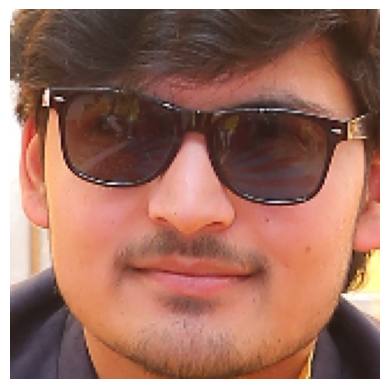

In [ ]:
plt.imshow(target_img[0][:,:,::-1])
plt.axis('off')
plt.show()

In [ ]:
target_embedding = model.predict(target_img)[0].tolist()

1/1 [==============================] - 0s 198ms/step


Reading from hdfs

In [ ]:
sdf = sparkSession.read.parquet('/tmp/hadoop-shubhamjha/dfs/name/facial_db/embeddings.parquet')

In [ ]:
sdf.printSchema()

root
 |-- img_name: string (nullable = true)
 |-- embedding: array (nullable = true)
 |    |-- element: double (containsNull = true)



In [ ]:
sdf = sdf.withColumn('target', F.array([F.lit(i) for i in target_embedding]))

In [ ]:
sdf.show(5)

+--------------------+--------------------+--------------------+
|            img_name|           embedding|              target|
+--------------------+--------------------+--------------------+
|dataset//2a8ab4d1...|[0.24776868522167...|[-0.7219305038452...|
|dataset//049A1105...|[0.10554003715515...|[-0.7219305038452...|
|dataset//049A1104...|[-0.3308723568916...|[-0.7219305038452...|
|dataset//5L5B2543...|[1.91312944889068...|[-0.7219305038452...|
|dataset//049A1117...|[-0.0283312499523...|[-0.7219305038452...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
sdf.show(5)

+--------------------+--------------------+--------------------+
|            img_name|           embedding|              target|
+--------------------+--------------------+--------------------+
|dataset//2a8ab4d1...|[0.24776868522167...|[-0.7219305038452...|
|dataset//049A1105...|[0.10554003715515...|[-0.7219305038452...|
|dataset//049A1104...|[-0.3308723568916...|[-0.7219305038452...|
|dataset//5L5B2543...|[1.91312944889068...|[-0.7219305038452...|
|dataset//049A1117...|[-0.0283312499523...|[-0.7219305038452...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
@F.udf("array<double>")
def subtract_dims(xs, ys):
    return [(x - y)*(x - y) for x, y in zip(xs, ys)]
sdf.show(5)

+--------------------+--------------------+--------------------+
|            img_name|           embedding|              target|
+--------------------+--------------------+--------------------+
|dataset//2a8ab4d1...|[0.24776868522167...|[-0.7219305038452...|
|dataset//049A1105...|[0.10554003715515...|[-0.7219305038452...|
|dataset//049A1104...|[-0.3308723568916...|[-0.7219305038452...|
|dataset//5L5B2543...|[1.91312944889068...|[-0.7219305038452...|
|dataset//049A1117...|[-0.0283312499523...|[-0.7219305038452...|
+--------------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
sdf = sdf.withColumn("dim_subtracts", subtract_dims("embedding", "target"))
sdf.show(5)

+--------------------+--------------------+--------------------+--------------------+
|            img_name|           embedding|              target|       dim_subtracts|
+--------------------+--------------------+--------------------+--------------------+
|dataset//2a8ab4d1...|[0.24776868522167...|[-0.7219305038452...|[0.94031651727697...|
|dataset//049A1105...|[0.10554003715515...|[-0.7219305038452...|[0.68470749622343...|
|dataset//049A1104...|[-0.3308723568916...|[-0.7219305038452...|[0.15292647429876...|
|dataset//5L5B2543...|[1.91312944889068...|[-0.7219305038452...|[6.94354095451252...|
|dataset//049A1117...|[-0.0283312499523...|[-0.7219305038452...|[0.48107992500078...|
+--------------------+--------------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
sdf = sdf.select('*')
sdf.show(5)

+--------------------+--------------------+--------------------+--------------------+
|            img_name|           embedding|              target|       dim_subtracts|
+--------------------+--------------------+--------------------+--------------------+
|dataset//2a8ab4d1...|[0.24776868522167...|[-0.7219305038452...|[0.94031651727697...|
|dataset//049A1105...|[0.10554003715515...|[-0.7219305038452...|[0.68470749622343...|
|dataset//049A1104...|[-0.3308723568916...|[-0.7219305038452...|[0.15292647429876...|
|dataset//5L5B2543...|[1.91312944889068...|[-0.7219305038452...|[6.94354095451252...|
|dataset//049A1117...|[-0.0283312499523...|[-0.7219305038452...|[0.48107992500078...|
+--------------------+--------------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
distance_column = []
for row in sdf.collect():  # Iterate over each row of the DataFrame
    distance = 0
    for element in row['dim_subtracts']:  # Iterate over each element in the `dim_subtracts` array
        distance += element
    distance_column.append(distance)

len(distance_column)


20

In [ ]:
distance_df = sparkSession.createDataFrame([(i,) for i in distance_column], ['distance'])
distance_df.show(5)

+------------------+
|          distance|
+------------------+
| 65.34675871643167|
| 36.44003132170641|
|191.38145829850913|
|136.84414082489312|
| 146.9098302407241|
+------------------+
only showing top 5 rows



In [ ]:
sdf = sdf.withColumn("id", F.monotonically_increasing_id())
distance_df = distance_df.withColumn("id", F.monotonically_increasing_id())

sdf.show(5)
distance_df.show(5)

+--------------------+--------------------+--------------------+--------------------+---+
|            img_name|           embedding|              target|       dim_subtracts| id|
+--------------------+--------------------+--------------------+--------------------+---+
|dataset//2a8ab4d1...|[0.24776868522167...|[-0.7219305038452...|[0.94031651727697...|  0|
|dataset//049A1105...|[0.10554003715515...|[-0.7219305038452...|[0.68470749622343...|  1|
|dataset//049A1104...|[-0.3308723568916...|[-0.7219305038452...|[0.15292647429876...|  2|
|dataset//5L5B2543...|[1.91312944889068...|[-0.7219305038452...|[6.94354095451252...|  3|
|dataset//049A1117...|[-0.0283312499523...|[-0.7219305038452...|[0.48107992500078...|  4|
+--------------------+--------------------+--------------------+--------------------+---+
only showing top 5 rows

+------------------+---+
|          distance| id|
+------------------+---+
| 65.34675871643167|  0|
| 36.44003132170641|  1|
|191.38145829850913|  2|
|136.8441408248

In [ ]:
sdf = sdf.join(distance_df, "id", "outer")
sdf.show(5)

+---+--------------------+--------------------+--------------------+--------------------+------------------+
| id|            img_name|           embedding|              target|       dim_subtracts|          distance|
+---+--------------------+--------------------+--------------------+--------------------+------------------+
|  0|dataset//2a8ab4d1...|[0.24776868522167...|[-0.7219305038452...|[0.94031651727697...| 65.34675871643167|
|  1|dataset//049A1105...|[0.10554003715515...|[-0.7219305038452...|[0.68470749622343...| 36.44003132170641|
|  2|dataset//049A1104...|[-0.3308723568916...|[-0.7219305038452...|[0.15292647429876...|191.38145829850913|
|  3|dataset//5L5B2543...|[1.91312944889068...|[-0.7219305038452...|[6.94354095451252...|136.84414082489312|
|  4|dataset//049A1117...|[-0.0283312499523...|[-0.7219305038452...|[0.48107992500078...| 146.9098302407241|
+---+--------------------+--------------------+--------------------+--------------------+------------------+
only showing top 5 

In [ ]:
sdf = sdf.withColumn("distance", F.sqrt("distance"))
sdf.show(5)


+---+--------------------+--------------------+--------------------+--------------------+------------------+
| id|            img_name|           embedding|              target|       dim_subtracts|          distance|
+---+--------------------+--------------------+--------------------+--------------------+------------------+
|  0|dataset//2a8ab4d1...|[0.24776868522167...|[-0.7219305038452...|[0.94031651727697...|  8.08373420619652|
|  1|dataset//049A1105...|[0.10554003715515...|[-0.7219305038452...|[0.68470749622343...| 6.036557903450145|
|  2|dataset//049A1104...|[-0.3308723568916...|[-0.7219305038452...|[0.15292647429876...|13.834068754293117|
|  3|dataset//5L5B2543...|[1.91312944889068...|[-0.7219305038452...|[6.94354095451252...|11.698040042028113|
|  4|dataset//049A1117...|[-0.0283312499523...|[-0.7219305038452...|[0.48107992500078...| 12.12063654437027|
+---+--------------------+--------------------+--------------------+--------------------+------------------+
only showing top 5 

In [ ]:
sdf.schema

StructType([StructField('id', LongType(), True), StructField('img_name', StringType(), True), StructField('embedding', ArrayType(DoubleType(), True), True), StructField('target', ArrayType(DoubleType(), False), True), StructField('dim_subtracts', ArrayType(DoubleType(), True), True), StructField('distance', DoubleType(), True)])

In [ ]:
sdf = sdf.drop("embedding", "target", "dim_subtracts")

In [ ]:
sdf.show(5)

+---+--------------------+------------------+
| id|            img_name|          distance|
+---+--------------------+------------------+
|  0|dataset//2a8ab4d1...|  8.08373420619652|
|  1|dataset//049A1105...| 6.036557903450145|
|  2|dataset//049A1104...|13.834068754293117|
|  3|dataset//5L5B2543...|11.698040042028113|
|  4|dataset//049A1117...| 12.12063654437027|
+---+--------------------+------------------+
only showing top 5 rows



SQL

In [ ]:
sdf.createOrReplaceTempView("facial_db")

In [ ]:
query = sparkSession.sql("SELECT img_name, distance from facial_db where distance < 13 order by distance asc")

In [ ]:
tic = time.time()
results = query.collect()
toc = time.time()

print(toc-tic," seconds")

2.11842679977417  seconds


In [ ]:
for result in results:
    print(result["img_name"], " /w ", round(result["distance"], 4)," distance")
    print("------------------------------------")

dataset//target.JPG  /w  0.0  distance
------------------------------------
dataset//049A1105.JPG  /w  6.0366  distance
------------------------------------
dataset//2a8ab4d1-597f-457a-a14a-4e8c4c047a21.JPG  /w  8.0837  distance
------------------------------------
dataset//5L5B0664.JPG  /w  11.5494  distance
------------------------------------
dataset//5L5B2543.JPG  /w  11.698  distance
------------------------------------
dataset//049A1449.JPG  /w  11.8826  distance
------------------------------------
dataset//049A1107.JPG  /w  11.906  distance
------------------------------------
dataset//5L5B0637.JPG  /w  11.9796  distance
------------------------------------
dataset//049A1117.JPG  /w  12.1206  distance
------------------------------------
dataset//049A1337.JPG  /w  12.4072  distance
------------------------------------


In [ ]:
from IPython.display import HTML
from base64 import b64encode

def show_image(path_to_image, width=None, height=None):

    mime_type = None
    #path_to_image = path_to_image.lower()

    # More MIME types:
    # https://developer.mozilla.org/en-US/docs/Web/HTTP/Basics_of_HTTP/MIME_types
    if path_to_image.endswith('.JPG') or path_to_image.endswith('.jpeg'):
        mime_type = 'image/jpeg'
    elif path_to_image.endswith('.png'):
        mime_type = 'image/png'
    elif path_to_image.endswith('.gif'):
        mime_type = 'image/gif'
    else:
        raise ValueError('Unknown extension: %s' % (path_to_image))

    img = open(path_to_image, 'rb').read()
    data_url = 'data:image/jpeg;base64,' + b64encode(img).decode()

    width_str = "width='%d'" % (width) if width is not None else ''
    height_str = "height='%d'" % (width) if height is not None else ''

    display(HTML("<img src='%s' %s%s>" % (data_url, width_str, height_str)))

In [ ]:
for result in results:
  show_image(result["img_name"].replace("//","/").replace("jpg","JPG"), 400, 400)